# 使用线性回归预测波士顿房价

## 变量说明

对所用到的变量做一个统一说明，方便检查。  

将$y=w_1x_1+w_2x_2+w_3x_3 + b$  改写为:  
   $y=w_0x_0+w_1x_1+w_2x_2+w_3x_3$    
   
设:  
m: 样本个数  
n_x：特征维度  
θ：($w_0,w_1,w_2,w_3 ...)$  
则：  
X的shape 为:(m,n_x+1)  
y的shape为：(m,1)  
θ 的shape = (n_x+1,1)

## 实现

### Package

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import seaborn as sb

### 加载数据

In [3]:
x, y=load_svmlight_file("data/housing_scale.txt")
y1=np.matrix(y)
yy=np.transpose(y1)

#矩阵之间是有格式的，我们需要转换格式 y1=np.matrix(y) yy=np.transpose(y1)
xx=x.todense()


In [4]:
Y=yy
X=xx
# 输出矩阵的行列数
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [5]:
#将数据分为训练集和测试集
train_X,test_X,train_y,test_y = train_test_split(X,Y,test_size = 0.2,random_state = 1)
print(f"train_X的大小为：{train_X.shape}")
print(f"tain_y的大小为：{train_y.shape}")
print(f"test_X的大小为：{test_X.shape}")
print(f"test_y的大小为：{test_y.shape}")

train_X的大小为：(404, 13)
tain_y的大小为：(404, 1)
test_X的大小为：(102, 13)
test_y的大小为：(102, 1)


In [6]:
#标准化
#mean计算均值
#std计算标准差
def nomalize(X,axis):
    mean = np.mean(X,axis)
    std = np.std(X,axis)
    print(mean.shape)
    return (X-mean)/std, mean,std

In [7]:
#将数据标准化
# 每一个对应的维度坐标取平均
train_X,mean,std = nomalize(train_X,axis=0)
test_X = (test_X-mean)/std

#插入一列全为1的表示b
train_X = np.insert(train_X,0,1,axis=1)
test_X = np.insert(test_X,0,1,axis=1)
print(train_X.shape)
print(test_X.shape)

(1, 13)
(404, 14)
(102, 14)


### 初始化参数

In [8]:
def init_parameters(n):
    theta = np.random.randn(n,1)
    return theta

### 定义损失函数

In [9]:
def compute_cost(y_,y):
    m = y.shape[0]
    cost = np.sum(np.square(y_-y))/(2*m)
    return cost

### 梯度下降

损失函数J(·)是一个凸函数。存在极小值。  
梯度下降所做的就是在损失函数上沿着导数方向下降，从而靠近极小值。  
所以实现梯度下降的步骤为:  
1.对θ求偏导:  
    $d_θ = \frac{d_{J(θ)}}{d_θ} = \frac{1}{m}X·(X·θ-y)$  
2.根据$d_θ$更新θ的值:   
$θ = θ-αd_θ$  
α为学习速率，人为指定。

In [10]:
def gradient_desent(X,y,theta,learning_rate):
    m = y.shape[0]
    y_ = np.dot(X,theta)
    d_theta = np.dot(X.T,y_-y)/m
    theta = theta - learning_rate*d_theta
    return theta

### 预测
使用模型函数进行预测

In [11]:
def predict(X,theta):
    return  np.dot(X,theta)

### 优化

In [12]:
def optimizer(train_X,train_y,theta,learning_rate,steps):
    costs = []
    for step in range(steps):
        theta = gradient_desent(train_X,train_y,theta,learning_rate)
        y_ = predict(train_X,theta)
        loss = compute_cost(y_,train_y)
        costs.append(loss)
        if step % 100 == 0:
            print(f"\nAfter {step} step(s),cost is :{loss}")
    return theta,costs

### 计算正确率
给定一个误差范围，如果预测值与真实值之差在该范围内，则表示预测准确

In [13]:
def calc_accuracy(y_pred,y,error_ratio):   
    '''
    y_pred---预测值
    y -- 真实值
    error_ratio ---误差范围，相比于真实值的百分比，如0.1，0.05
    '''
    y = y.reshape(-1,1)
    m = y.shape[0]
    correct_num = np.sum(np.fabs(y_pred-y) < error_ratio*y)
    return correct_num/m

### 组合到一起，训练模型

In [14]:
def model(train_X,train_y,test_X,test_y,learning_rate=0.05,steps=1):
    m,n_x = train_X.shape
    print(learning_rate)
    #初始化参数
    theta = init_parameters(n_x)
    theta,costs = optimizer(train_X,train_y,theta,learning_rate,steps)
    
    error_ratio = 0.30 # 即误差不能超过30%
    print("==== 训练集验证 ====")
    y_pred = predict(train_X,theta)
    corr_ratio = calc_accuracy(y_pred,train_y,error_ratio)
    print(f"训练集的正确率为：{corr_ratio}")
    
    print("==== 验证集验证 ====")
    y_pred = predict(test_X,theta)
    corr_ratio = calc_accuracy(y_pred,test_y,error_ratio)
    print(f"验证集的正确率为：{corr_ratio}")
    cost = compute_cost(y_pred,test_y)
    print(f"验证集的损失为：{cost}")

    # 绘制损失函数
    plt.xlim(0,steps)
    plt.plot(costs)
    plt.xlabel("step(s)")
    plt.ylabel("costs")
    plt.show() 
    return theta

0.09

After 0 step(s),cost is :255.6167876507349

After 100 step(s),cost is :11.091761490568988

After 200 step(s),cost is :10.9696507044876

After 300 step(s),cost is :10.944060665008745

After 400 step(s),cost is :10.935786931877141

After 500 step(s),cost is :10.93292851296147

After 600 step(s),cost is :10.931932208389043

After 700 step(s),cost is :10.93158452439508
==== 训练集验证 ====
训练集的正确率为：0.8787128712871287
==== 验证集验证 ====
验证集的正确率为：0.8235294117647058
验证集的损失为：11.69242345721142


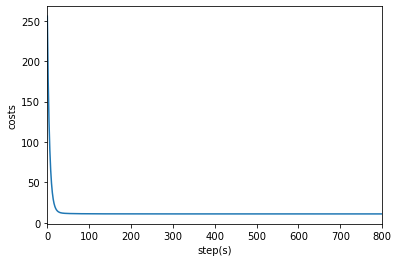

In [16]:
theta = model(train_X,train_y,test_X,test_y,learning_rate=0.09,steps=800)

## 总结

这里使用的是线性回归，线性增长。实际上更应该是增长到一定程度应该放缓。
所以更应该选用类似$\sqrt$z